In [1]:
import acquire
import prepare
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [3]:
titanic_df.survived.value_counts(normalize=True)

# For this, baseline prediction is all will perish, because our baseline
# accuracy tells us that we would be 60% chance of being right, because
# data shows 61% perished 

0    0.616162
1    0.383838
Name: survived, dtype: float64

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [4]:
train, validate, test = prepare.prep_titanic_data(titanic_df)
train.head()

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [5]:
# create the object
titanic_model = DecisionTreeClassifier(max_depth=3, random_state=123)
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [6]:
titanic_model = titanic_model.fit(X_train, y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(272.025, 142.695, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(544.05, 237.825, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(453.375, 142.695, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = 0'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\

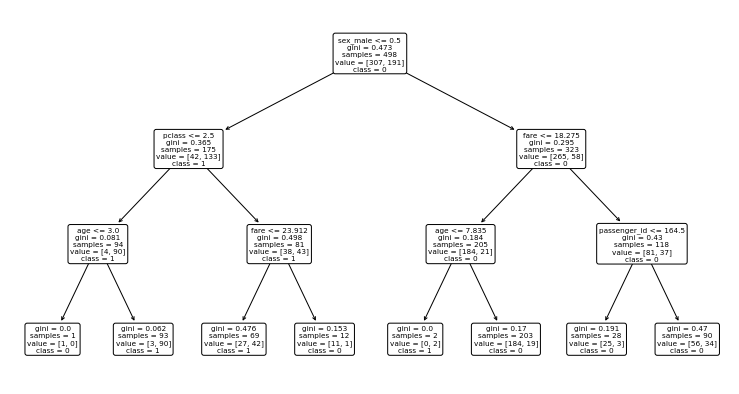

In [7]:
plt.figure(figsize=(13, 7))
plot_tree(titanic_model, feature_names=X_train.columns, class_names=titanic_model.classes_.astype(str), rounded=True)

In [8]:
y_pred = titanic_model.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [9]:
y_pred_proba = titanic_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [10]:
# Model Score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(titanic_model.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [11]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [12]:
print(classification_report(y_train, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [13]:
# Just looks pretty
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [14]:
# If not-survived is our positive case
TP = 265
FP = 58
FN = 42
TN = 133
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7991967871485943
True Positive Rate: 0.8631921824104235
False Positive Rate: 0.3036649214659686
True Negative Rate: 0.6963350785340314
False Negative Rate: 0.13680781758957655
Precision: 0.8204334365325078
Recall: 0.8631921824104235
F1 Score: 0.8412698412698413
Support (0): 307
Support (1): 191


In [15]:
# Run through steps 2-4 using a different max_depth value.
# create the object
titanic_model = DecisionTreeClassifier(max_depth=10, random_state=123)
X_train = train.drop(columns=['survived'])
y_train = train.survived

# only thing changing is max dept from 3 to 10
titanic_model = titanic_model.fit(X_train, y_train)

In [16]:
## Another way to do this instead of manually is a for loop
# Let's get loopy
for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.853211    0.836257   0.84739    0.844734      0.846709
recall       0.908795    0.748691   0.84739    0.828743      0.847390
f1-score     

In [17]:
y_pred = titanic_model.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [18]:
y_pred_proba = titanic_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [19]:
# Model Score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(titanic_model.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


In [20]:
confusion_matrix(y_train, y_pred)

array([[304,   3],
       [ 15, 176]])

In [21]:
print(classification_report(y_train, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       307
           1       0.98      0.92      0.95       191

    accuracy                           0.96       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.96      0.96      0.96       498



Which model performs better on your in-sample data? In sample = train set
Second model has 96% accuracy (max length - 10) while First model (max length = 3) was only 83%

Which model performs best on your out-of-sample data, the validate set?


In [22]:
titanic_model = DecisionTreeClassifier(max_depth=3, random_state=123)
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived
titanic_model = titanic_model.fit(X_train, y_train)

In [23]:
y_pred = titanic_model.predict(X_validate)
y_pred[0:5]

array([0, 0, 0, 1, 0])

In [24]:
y_pred_proba = titanic_model.predict_proba(X_validate)
y_pred_proba[0:5]

array([[0.91666667, 0.08333333],
       [0.62222222, 0.37777778],
       [0.90640394, 0.09359606],
       [0.03225806, 0.96774194],
       [0.90640394, 0.09359606]])

In [25]:
print(classification_report(y_validate, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       132
           1       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214



In [26]:
titanic_model = DecisionTreeClassifier(max_depth=10, random_state=123)
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived
titanic_model = titanic_model.fit(X_train, y_train)

In [27]:
y_pred = titanic_model.predict(X_validate)
y_pred[0:5]

array([0, 0, 0, 1, 0])

In [28]:
y_pred_proba = titanic_model.predict_proba(X_validate)
y_pred_proba[0:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.89393939, 0.10606061],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [29]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       132
           1       0.70      0.70      0.70        82

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.77      0.77      0.77       214



In this case, the first test does better with an accuracy of 80%, depth of 3 while second test with dept of 10 is 77%

Work through these same exercises using the Telco dataset.

In [30]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [31]:
train, validate, test = prepare.prep_telco_data(telco_df)
train.head()

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df.total_charges.astype(float)
/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:143: SettingWithCopyWarning: 
A value is trying to be 

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
telco_model = DecisionTreeClassifier(max_depth=3, random_state=123)
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded
telco_model = telco_model.fit(X_train, y_train)

[Text(362.7, 332.955, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(181.35, 237.825, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(90.675, 142.695, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(45.3375, 47.565, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = 0'),
 Text(272.025, 142.695, 'total_charges <= 124.475\ngini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.203\nsamples = 131\nvalue = [15, 116]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.453\nsamples = 436\nvalue = [151, 285]\nclass = 1'),
 Text(544.05, 237.825, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclass = 0'),
 Text(453.375, 142.695, 'contract_type_Two year <= 0.5\ngini = 0.099\nsamples =

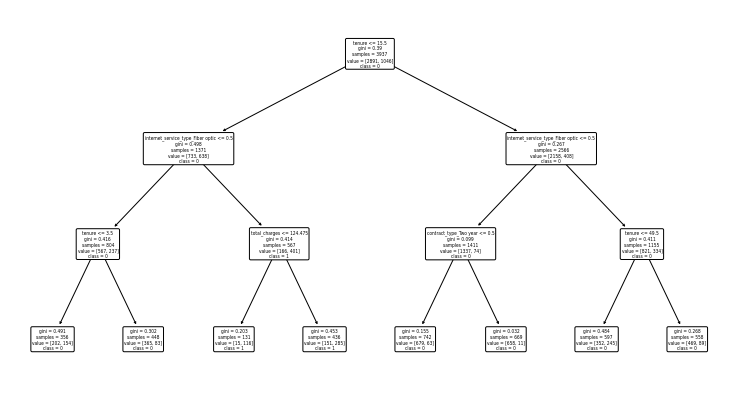

In [33]:
plt.figure(figsize=(13, 7))
plot_tree(telco_model, feature_names=X_train.columns, class_names=telco_model.classes_.astype(str), rounded=True)

In [34]:
y_pred = telco_model.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [35]:
y_pred_proba = telco_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.91509434, 0.08490566],
       [0.84050179, 0.15949821],
       [0.91509434, 0.08490566],
       [0.56741573, 0.43258427],
       [0.91509434, 0.08490566]])

In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [37]:
telco_model = DecisionTreeClassifier(max_depth=10, random_state=123)
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded
telco_model = telco_model.fit(X_train, y_train)

In [38]:
y_pred = telco_model.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [39]:
y_pred_proba = telco_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.875     , 0.125     ],
       [0.94444444, 0.05555556],
       [0.94117647, 0.05882353],
       [0.91666667, 0.08333333],
       [0.94117647, 0.05882353]])

In [40]:
print(classification_report(y_train, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2891
           1       0.78      0.76      0.77      1046

    accuracy                           0.88      3937
   macro avg       0.85      0.84      0.84      3937
weighted avg       0.88      0.88      0.88      3937



In [41]:
telco_model = DecisionTreeClassifier(max_depth=3, random_state=123)
X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded
telco_model = telco_model.fit(X_train, y_train)

In [42]:
y_pred = telco_model.predict(X_validate)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [43]:
y_pred_proba = telco_model.predict_proba(X_validate)
y_pred_proba[0:5]

array([[0.58961474, 0.41038526],
       [0.98355755, 0.01644245],
       [0.91509434, 0.08490566],
       [0.98355755, 0.01644245],
       [0.98355755, 0.01644245]])

In [44]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1239
           1       0.63      0.37      0.47       449

    accuracy                           0.78      1688
   macro avg       0.72      0.65      0.66      1688
weighted avg       0.76      0.78      0.75      1688



In [45]:
telco_model = DecisionTreeClassifier(max_depth=10, random_state=123)
X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded
telco_model = telco_model.fit(X_train, y_train)

In [46]:
y_pred = telco_model.predict(X_validate)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [47]:
y_pred_proba = telco_model.predict_proba(X_validate)
y_pred_proba[0:5]

array([[0.55769231, 0.44230769],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.98850575, 0.01149425]])

In [48]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1239
           1       0.53      0.57      0.55       449

    accuracy                           0.75      1688
   macro avg       0.69      0.69      0.69      1688
weighted avg       0.76      0.75      0.75      1688



First test with dept of 3 has accuracy of 78% while second test with max of 10 is 75% accurate. So first model is better, but not by much

## Exercises

Continue working in your `model` file with titanic data to do the following:

In [49]:
train, validate, test = prepare.prep_titanic_data(titanic_df)
train.head()

# all my sets
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [61]:
titanic_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, 
                            random_state=123)
titanic_rf.fit(X_train, y_train)

y_pred = titanic_rf.predict(X_train)
y_pred_proba = titanic_rf.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [62]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(titanic_rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.98


In [63]:
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 11 180]]


In [64]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       307
           1       1.00      0.94      0.97       191

    accuracy                           0.98       498
   macro avg       0.98      0.97      0.98       498
weighted avg       0.98      0.98      0.98       498



3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [65]:
TP = 307
FP = 11
FN = 0
TN = 180
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9779116465863453
True Positive Rate: 1.0
False Positive Rate: 0.05759162303664921
True Negative Rate: 0.9424083769633508
False Negative Rate: 0.0
Precision: 0.9654088050314465
Recall: 1.0
F1 Score: 0.9824
Support (0): 307
Support (1): 191


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

In [72]:
# Let's get loopy
for i in range(1, 22):
    # Make the model
    tree = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.758186    0.940594  0.795181    0.849390      0.828146
recall       0.980456    0.497382  0.795181    0.738919      0.795181
f1-score     0.855114    0.650685  0.795181    0.752899      0.776708
support    307.000000  191.000000  0.795181  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.776882    0.857143  0.797189    0.817012      0.807665
recall       0.941368    0.565445  0.797189    0.753407      0.797189
f1-score     0.851252    0.681388  0.797189    0.766320      0.786103
support    307.000000  191.000000  0.797189  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.821326    0.854305  0.831325    0.837815      0.833974
recall       0.928339    0.675393  0.831325    0.801866      0.831325
f1-score     

5. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

We want scores to be close to eachother as possible, so in this case lower the better.

6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [73]:
metrics = []

for i in range(1, 11):
    # Make the model
    tree = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.795181,0.761682,0.033498
1,2,0.797189,0.785047,0.012142
2,3,0.831325,0.794393,0.036933
3,4,0.855422,0.808411,0.047010
4,5,0.877510,0.813084,0.064426
5,6,0.915663,0.803738,0.111924
6,7,0.939759,0.822430,0.117329
7,8,0.953815,0.813084,0.140731
8,9,0.961847,0.803738,0.158109
9,10,0.977912,0.803738,0.174173


In [74]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.877510,0.813084,0.064426
3,4,0.855422,0.808411,0.047010
2,3,0.831325,0.794393,0.036933
1,2,0.797189,0.785047,0.012142
0,1,0.795181,0.761682,0.033498
